# Performance comparison for list subtraction

Subtract items in a list backwards. The subtraction should go like this: <br/>
index 1 - index 0, index 2 - index 1, and so on and so forth.

In [1]:
# refer https://stackoverflow.com/questions/50940549/how-to-subtract-backwards-in-a-list-in-python-3#50940755

In [2]:
# import libraries
import operator
from itertools import islice
from timeit import timeit
from itertools import chain
import tkinter
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
# function 1 
def fun1(l):
    return [map(operator.sub, islice(l, 1, None), l)]

In [5]:
# function 2
def fun2(l):
    return [i - j for i, j in zip(l[1:], l)]

In [6]:
# function 3
def fun3(l):
    for i in range(len(l)-1,1,-1):
        l[i] = l[i]-l[i-1]
    return l[i]

In [7]:
# function 4
def fun4(l):
    return [l[i+1]- l[i] for i in range(len(l)-1)]

In [8]:
# function 5
def fun5(l):
    return [(l[i+1] - l[i]) for i in range(len(l)-1)]

In [9]:
# create a pandas dataframe 
# index has the list of functions
# columns has the multiplication factor - 
# to increase input list size (thereby complexity)
res = pd.DataFrame(
       index=['fun1', 'fun2', 'fun3', 'fun4', 'fun5',],
       columns=[10, 50, 100, 500, 1000, 5000, 10000], # 50000, 100000],
       dtype=float
)

In [10]:
# each function to be looped over the mul.factors
# timeit is used and output to dataframe
for f in res.index: 
    for c in res.columns:
        l = [1,2,3,4,5,6,7,8,9,10] * c
        stmt = '{}(l)'.format(f)       # f(l)
        setp = 'from __main__ import l, {}'.format(f)
        res.at[f, c] = timeit(stmt, setp, number=50)

E:\Python\Anaconda\lib\site-packages\matplotlib\axes\_base.py:3285: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


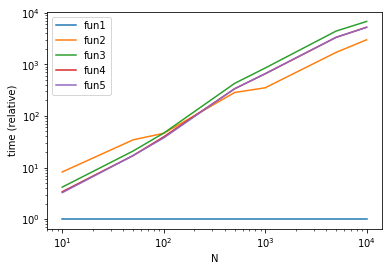

In [11]:
# using matplotlib to plot 
ax = res.div(res.min()).T.plot(loglog=True) 
ax.set_xlabel("N"); 
ax.set_ylabel("time (relative)");

In [12]:
# plt.show()